### Test for SNR requirement

#### 1. Set working enviroment

In [1]:
import sys
import os
import yaml
import numpy as np
from netCDF4 import Dataset
import matplotlib
# define  path to search for module
sys.path.append("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/")
os.chdir("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/examples/exp5_snr/")

#### 2. import teds modules

In [2]:
from teds.gm import geometry_module
from teds.sgm import geoscene_generation
from teds.sgm import Carbon_radiation_scene_generation
from teds.im import run_instrument_model
from teds.l1al1b import run_l1al1b
from teds.l1l2.l1bl2 import level1b_to_level2_processor_RTorCH4, level1b_to_level2_processor
from teds.lib.libNumTools import get_isrf

### 3. Set variables applicable to all cells

In [4]:
path  = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/'


### 4. GM

In [9]:

#configureation file
#In this case, the gm does not include solar and viewing geometry. It is easier to define them with the notebook
gm_config= yaml.safe_load(open('./settings/gm_config.yaml'))
#we use the nact dimension to simulate scenes with different scaling factors s and the geometry of Lref
nact = 100 
gm_config['scene_spec'] = {}
gm_config['scene_spec']['sza'] = np.zeros(nact) + 70.
gm_config['scene_spec']['saa'] = np.zeros(nact) 
gm_config['scene_spec']['vza'] = np.zeros(nact) 
gm_config['scene_spec']['vaa'] = np.zeros(nact) 

geometry_module(gm_config)


/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/gm/Tango_Carbon_gm_exp5.0.nc
2025-01-03 20:10:50,740 : teds.lib.lib_utils : gm : 465 : INFO : =>gm calculation finished successfully. 
2025-01-03 20:10:50,740 : teds.lib.lib_utils : gm : 465 : INFO : =>gm calculation finished successfully. 


[20:10:50] =>gm calculation finished successfully. 


#### 5. SGM-GEO

In [ ]:
albedo = np.ones(nact)*0.15
sgmgeo_config= yaml.safe_load(open('./settings/sgmgeo_config.yaml'))
sgmgeo_config['scene_spec']={}
sgmgeo_config['scene_spec']['albedo'] = albedo
sgmgeo_config['io_files']['output_geo']=path+'sgm/Tango_Carbon_sgm_atmosphere_exp5.0.nc'
geoscene_generation(sgmgeo_config)

=>sgm geoscene calculation finished successfully


/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/teds/lib/libGM.py:187: RuntimeWarning: invalid value encountered in divide
  cU1 * cU2 * slam / sin_sigma)


#### 6. SGM-RAD

In [ ]:
sgmrad_config= yaml.safe_load(open('./settings/sgmrad_config.yaml'))
sgmrad_config['io_files']['input_sgm_geo']=path+'sgm/Tango_Carbon_sgm_atmosphere_exp5.0.nc'
sgmrad_config['io_files']['output_rad']=path + 'sgm/Tango_Carbon_sgm_radiance_exp5.0.nc'
Carbon_radiation_scene_generation(sgmrad_config)

Radiative tranfer simulation...


100%|██████████| 1/1 [00:03<00:00,  3.61s/it]

=>Carbon radsgm calculation finished successfully


### 7. Instrument model 

Run the instrument model for each scaled scenes using a seperate call 

In [ ]:
im_config= yaml.safe_load(open('./settings/im_config.yaml'))
im_config['io']['sgm'] = path + 'sgm/Tango_Carbon_sgm_radiance_exp5.0.nc'
im_config['io']['l1a'] = path + 'level1a/Tango_Carbon_l1a_exp5.0_bin5.nc'
im_config['detector']['binning_table_id'] = 5  
run_instrument_model(im_config)

im_config['io']['sgm'] = path + 'sgm/Tango_Carbon_sgm_radiance_exp5.0.nc'
im_config['io']['l1a'] = path + 'level1a/Tango_Carbon_l1a_exp5.0_bin1.nc'
im_config['detector']['binning_table_id'] = 1  
run_instrument_model(im_config)

[20:11:57] Processing from SGM to l1a


##########################
# Tango instrument model #
##########################
Version                 : 0.0.1
Commit hash             : 30f14c8f
Date and timezone       : 2025 January 03 Fri
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux 6.8.0-50-generic

##############################
# Reading CKD and input data #
##############################


[20:11:58] Reading input data
[20:11:58] ISRF convolution



#################
# Forward model #
#################


100%|██████████| 1/1 [00:00<00:00,  2.54 ALT/s]
[20:12:00] Radiometric
100%|██████████| 1/1 [00:00<00:00, 1184.16it/s]
[20:12:00] Detector mapping
100%|██████████| 1/1 [00:56<00:00, 56.88s/it]
[20:12:57] Stray light
100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
[20:12:58] PRNU
[20:12:58] Nonlinearity
[20:12:58] Dark signal
[20:12:58] Noise
[20:12:58] Dark offset
[20:12:58] Coadding and binning
[20:12:58] Writing output data
[20:12:58] Processing from SGM to l1a



###########
# Success #
###########
##########################
# Tango instrument model #
##########################
Version                 : 0.0.1
Commit hash             : 30f14c8f
Date and timezone       : 2025 January 03 Fri
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux 6.8.0-50-generic

##############################
# Reading CKD and input data #
##############################


[20:12:59] Reading input data
[20:12:59] ISRF convolution



#################
# Forward model #
#################


100%|██████████| 1/1 [00:00<00:00,  2.75 ALT/s]
[20:12:59] Radiometric
100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]
[20:12:59] Detector mapping
100%|██████████| 1/1 [00:58<00:00, 58.65s/it]
[20:13:58] Stray light
100%|██████████| 1/1 [00:01<00:00,  1.19s/it]
[20:13:59] PRNU
[20:13:59] Nonlinearity
[20:13:59] Dark signal
[20:13:59] Noise
[20:13:59] Dark offset
[20:13:59] Coadding and binning
[20:13:59] Writing output data



###########
# Success #
###########


#### 8. L1B processing

In [13]:
l1al1b_config= yaml.safe_load(open('./settings/l1al1b_config.yaml'))
l1al1b_config['io']['l1a'] = path + 'level1a/Tango_Carbon_l1a_exp5.0_bin5.nc'
l1al1b_config['io']['l1b'] = path + 'level1b/Tango_Carbon_l1b_exp5.0_bin5.nc'
run_l1al1b(l1al1b_config)
l1al1b_config['io']['l1a'] = path + 'level1a/Tango_Carbon_l1a_exp5.0_bin1.nc'
l1al1b_config['io']['l1b'] = path + 'level1b/Tango_Carbon_l1b_exp5.0_bin1.nc'
run_l1al1b(l1al1b_config)

[20:14:04] [WARNING] unrecognized input parameter: reverse_wavelength
[20:14:04] [WARNING] unrecognized input parameter: swath
[20:14:04] Processing from L1A to L1B


#######################
# Tango L1B processor #
#######################
Version                 : 0.0.1
Commit hash             : 30f14c8f
Date and timezone       : 2025 January 03 Fri
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux 6.8.0-50-generic

##############################
# Reading CKD and input data #
##############################


[20:14:04] Reading input data
[20:14:05] Coadding and binning
[20:14:05] Dark offset
[20:14:05] Noise
[20:14:05] Dark current
[20:14:05] Nonlinearity



#############
# Retrieval #
#############


100%|██████████| 1/1 [00:00<00:00, 112.79it/s]
[20:14:05] PRNU
100%|██████████| 1/1 [00:00<00:00, 183.09it/s]
[20:14:05] Smoothing over bad values
100%|██████████| 1/1 [00:00<00:00, 22.36it/s]
[20:14:06] Stray light
100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
[20:14:09] Mapping from detector
100%|██████████| 1/1 [00:34<00:00, 34.12s/it]
[20:14:43] Interpolating from intermediate to main CKD wavelength grids
[20:14:43] Radiometric
[20:14:43] Writing output data
[20:14:43] [WARNING] unrecognized input parameter: reverse_wavelength
[20:14:43] [WARNING] unrecognized input parameter: swath
[20:14:43] Processing from L1A to L1B



###########
# Success #
###########
#######################
# Tango L1B processor #
#######################
Version                 : 0.0.1
Commit hash             : 30f14c8f
Date and timezone       : 2025 January 03 Fri
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux 6.8.0-50-generic

##############################
# Reading CKD and input data #
##############################


[20:14:44] Reading input data
[20:14:45] Coadding and binning
[20:14:45] Dark offset
[20:14:45] Noise
[20:14:45] Dark current
[20:14:45] Nonlinearity



#############
# Retrieval #
#############


100%|██████████| 1/1 [00:00<00:00, 19.50it/s]
[20:14:45] PRNU
100%|██████████| 1/1 [00:00<00:00, 50.83it/s]
[20:14:45] Smoothing over bad values
100%|██████████| 1/1 [00:00<00:00,  4.73it/s]
[20:14:46] Stray light
100%|██████████| 1/1 [00:03<00:00,  3.67s/it]
[20:14:49] Mapping from detector
100%|██████████| 1/1 [00:55<00:00, 55.60s/it]
[20:15:45] Interpolating from intermediate to main CKD wavelength grids
[20:15:45] Radiometric
[20:15:45] Writing output data



###########
# Success #
###########


#### 9. Data analysis

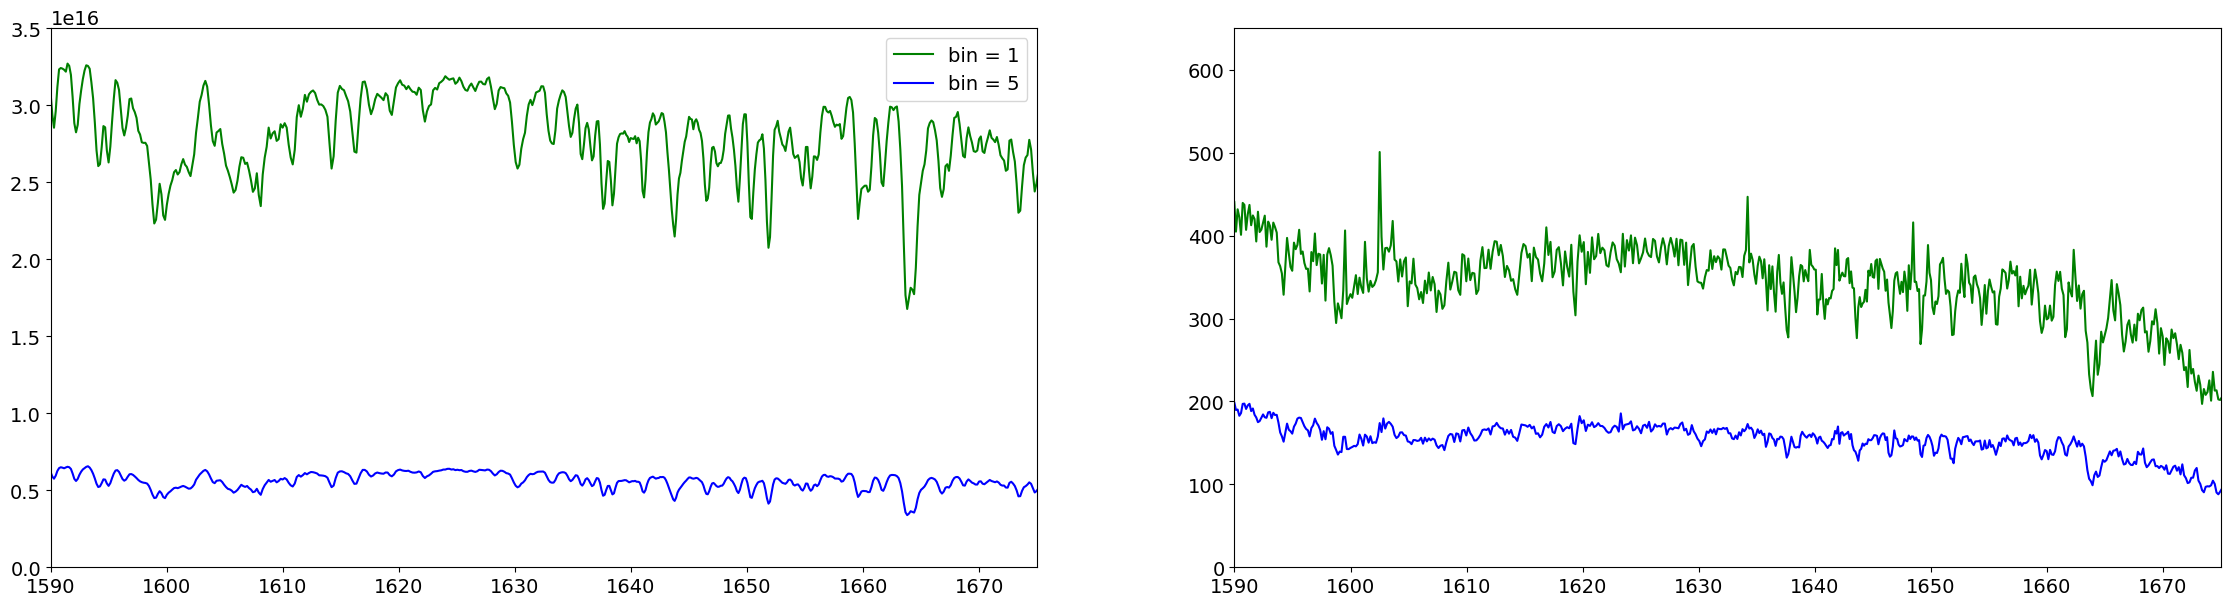

In [14]:
import netCDF4 as nc
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import sys
plt.rcParams.update({'font.size': 14,})
path ='/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/'

nact  = 100
nwave = 550

filenamel1b = path + 'level1b/Tango_Carbon_l1b_exp5.0_bin1.nc'
l1b_data = nc.Dataset(filenamel1b)
wave_b1  = np.array(deepcopy(l1b_data['observation_data']['wavelength'][:]))
rad_b1   = np.array(deepcopy(l1b_data['observation_data']['radiance'][:]))
noise_b1 = np.array(deepcopy(l1b_data['observation_data']['radiance_stdev'][:]))
snr_b1   = rad_b1/noise_b1

filenamel1b = path + 'level1b/Tango_Carbon_l1b_exp5.0_bin5.nc'
l1b_data = nc.Dataset(filenamel1b)
wave_b5  = np.array(deepcopy(l1b_data['observation_data']['wavelength'][:]))
rad_b5   = np.array(deepcopy(l1b_data['observation_data']['radiance'][:]))
noise_b5 = np.array(deepcopy(l1b_data['observation_data']['radiance_stdev'][:]))
snr_b5   = rad_b5/noise_b5

fig = plt.figure(figsize=(28, 7), dpi=100,)
ax0 = fig.add_subplot(121)
ax0.plot(wave_b1[0,:], rad_b1[0,50,:], color = 'green', label = 'bin = 1')
ax0.plot(wave_b5[0,:], rad_b5[0,50,:], color = 'blue', label = 'bin = 5')
ax0.set_ylim([0.0,3.5E16])
ax0.set_xlim([1590,1675])
plt.legend()

ax1 = fig.add_subplot(122)
ax1.plot(wave_b1[0,:], snr_b1[0,50,:], color = 'green')
ax1.plot(wave_b5[0,:], snr_b5[0,50,:], color = 'blue')
ax1.set_xlim([1590,1675])
ax1.set_ylim([0.0,650])